In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from os.path import join
from statsmodels.tsa.tsatools import detrend
import itertools
import sys
sns.set()

In [2]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

In [3]:
# add the 'src' directory as one where we can import modules
src_dir = join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

In [4]:
%aimport Analysis.index
from Analysis.index import facility_co2, adjust_epa_emissions, group_fuel_cats
from Analysis.index import reduce_emission_factors, add_datetime
%aimport util.utils
from util.utils import rename_cols

## Load national index and percent gen data

In [5]:
cwd = os.getcwd()
path = join(cwd, '..', 'Data storage', 'National data', 'National index.csv')
national_index = pd.read_csv(path, parse_dates=['datetime'])
national_index['nerc'] = 'USA'
rename_cols(national_index)

In [6]:
national_index.head()

,year,month,generation (mwh),final co2 (kg),datetime,quarter,index (g/kwh),change since 2005,index (lb/mwh),nerc
0,2001,1,332493160.0,2.149920e+11,2001-01-01,1,646.604591,0.076326,1425.504481,USA
1,2001,2,282940198.0,1.803140e+11,2001-02-01,1,637.284923,0.060812,1404.958340,USA
2,2001,3,300706544.0,1.891340e+11,2001-03-01,1,628.965732,0.046964,1386.617853,USA
3,2001,4,278078871.0,1.748850e+11,2001-04-01,2,628.902838,0.046860,1386.479197,USA
4,2001,5,300491621.0,1.892470e+11,2001-05-01,2,629.790069,0.048337,1388.435187,USA


In [7]:
path = join(cwd, '..', 'Data storage', 'National data', 'National percent gen.csv')
national_per_gen = pd.read_csv(path)
add_datetime(national_per_gen)
national_per_gen['nerc'] = 'USA'

In [8]:
national_per_gen.head()

,year,month,fuel category,generation (mwh),datetime,nerc
0,2001,1,Coal,0.533205,2001-01-01,USA
1,2001,2,Coal,0.529212,2001-02-01,USA
2,2001,3,Coal,0.516347,2001-03-01,USA
3,2001,4,Coal,0.505866,2001-04-01,USA
4,2001,5,Coal,0.504483,2001-05-01,USA


In [59]:
path = join(cwd, '..', 'Data storage', 'National data', 'National generation.csv')
national_gen = pd.read_csv(path)
add_datetime(national_gen)
national_gen['nerc'] = 'USA'

In [60]:
national_gen.head()

,fuel category,year,month,generation (mwh),datetime,nerc
0,Coal,2001,1,177287111.0,2001-01-01,USA
1,Coal,2001,2,149735484.0,2001-02-01,USA
2,Coal,2001,3,155269011.0,2001-03-01,USA
3,Coal,2001,4,140670654.0,2001-04-01,USA
4,Coal,2001,5,151592914.0,2001-05-01,USA


## Load NERC index and percent gen data

In [9]:
path = join(cwd, '..', 'Data storage', 'final NERC data', 'NERC gen emissions and index.csv')
nerc_index = pd.read_csv(path, parse_dates=['datetime'])
nerc_index.rename(columns={'index': 'index (g/kwh)'}, inplace=True)

In [10]:
nerc_index.head()

,nerc,year,month,final co2 (kg),generation (mwh),index (g/kwh),datetime
0,-,2001,1,5.476076e+09,7185661.388,762.083771,2001-01-01
1,-,2001,2,4.349473e+09,6526739.453,666.408193,2001-02-01
2,-,2001,3,4.223575e+09,6304139.884,669.968545,2001-03-01
3,-,2001,4,4.544873e+09,6624660.323,686.053817,2001-04-01
4,-,2001,5,4.972656e+09,7045482.729,705.793523,2001-05-01


In [11]:
path = join(cwd, '..', 'Data storage', 'final NERC data', 'NERC percent gen.csv')
nerc_per_gen = pd.read_csv(path, parse_dates=['datetime'])
nerc_per_gen.drop(['year', 'month'], inplace=True, axis=1)

In [12]:
nerc_per_gen.head()

,fuel category,datetime,nerc,generation (mwh)
0,Coal,2001-01-01,-,0.693624
1,Coal,2001-02-01,-,0.616249
2,Coal,2001-03-01,-,0.601500
3,Coal,2001-04-01,-,0.621707
4,Coal,2001-05-01,-,0.637201


## Combine NERC and national results

In [13]:
index = pd.concat([national_index, nerc_index])

In [14]:
index.head()

,change since 2005,datetime,final co2 (kg),generation (mwh),index (g/kwh),index (lb/mwh),month,nerc,quarter,year
0,0.076326,2001-01-01,2.149920e+11,332493160.0,646.604591,1425.504481,1,USA,1.0,2001
1,0.060812,2001-02-01,1.803140e+11,282940198.0,637.284923,1404.958340,2,USA,1.0,2001
2,0.046964,2001-03-01,1.891340e+11,300706544.0,628.965732,1386.617853,3,USA,1.0,2001
3,0.046860,2001-04-01,1.748850e+11,278078871.0,628.902838,1386.479197,4,USA,2.0,2001
4,0.048337,2001-05-01,1.892470e+11,300491621.0,629.790069,1388.435187,5,USA,2.0,2001


In [87]:
per_gen = pd.concat([national_per_gen, nerc_per_gen])
per_gen.rename(columns={'generation (mwh)': 'Fraction Generation'}, inplace=True)
per_gen.year = per_gen['datetime'].dt.year
per_gen.month = per_gen['datetime'].dt.month

In [81]:
per_gen.head()

,datetime,fuel category,Fraction Generation,month,nerc,year
0,2001-01-01,Coal,0.533205,1.0,USA,2001
1,2001-02-01,Coal,0.529212,2.0,USA,2001
2,2001-03-01,Coal,0.516347,3.0,USA,2001
3,2001-04-01,Coal,0.505866,4.0,USA,2001
4,2001-05-01,Coal,0.504483,5.0,USA,2001


## Figures

In [45]:
sns.set_style('white', {'axes.linewidth': 1.5,
                        'axes.grid': True})
sns.set_context('notebook', font_scale=1.2)

In [43]:
def region_facet_grid(df, plot_function, x_axis, y_axis, col_order=None,
                      suptitle='', add_legend=False, ax_labels=None,
                      FG_kwargs={}, plot_kwargs={}, context='notebook',
                      font_scale=1.2):
    sns.set_context(context, font_scale)
    g = sns.FacetGrid(df, col_order=col_order, **FG_kwargs)
    g.map(plot_function, x_axis, y_axis, **plot_kwargs)
    g.set_xticklabels(rotation=35)
    if add_legend:
        g.add_legend()
    if suptitle:
        plt.suptitle(suptitle, y=1.02, size=15)
    if col_order and 'col' in FG_kwargs:
        axes = g.axes.flatten()
        for ax, title in zip(axes, order):
            ax.set_title(title)
    if ax_labels:
        g.set_axis_labels(ax_labels)

### Index figure

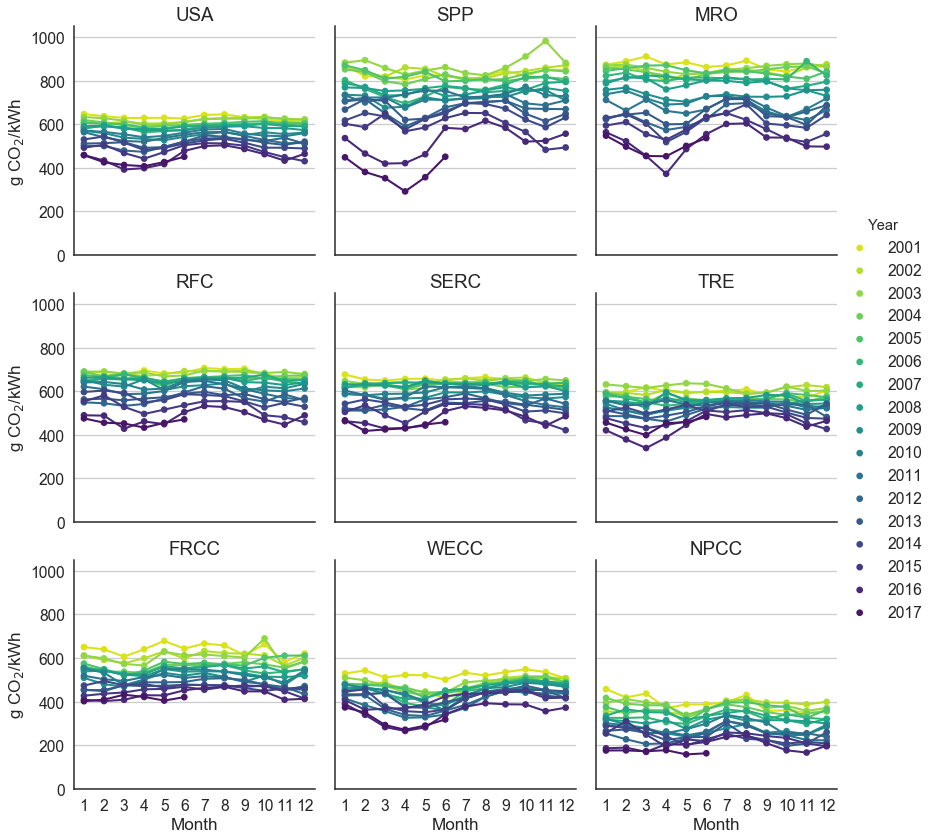

In [56]:
order = ['USA', 'SPP', 'MRO', 'RFC', 'SERC', 'TRE', 'FRCC', 'WECC', 'NPCC']
temp = index.copy()
temp.rename(columns={'month': 'Month',
                     'year': 'Year'}, inplace=True)
with sns.plotting_context('talk', font_scale=1.2):

    g = sns.factorplot(x='Month', y='index (g/kwh)', hue='Year', 
                       data=temp, col='nerc', col_wrap=3, col_order=order, 
                       palette='viridis_r', scale=0.5)

    axes = g.axes.flatten()
    for ax, title in zip(axes, order):
        ax.set_title(title)
        ax.set_ylim(0, 1050)
        if title in ['USA', 'RFC', 'FRCC']:
            ax.set_ylabel('g CO$_2$/kWh')
            
path = join(cwd, '..', 'Figures', 'Monthly index (12-months)_full.pdf')
plt.savefig(path, bbox_inches='tight')

### Percent gen figures

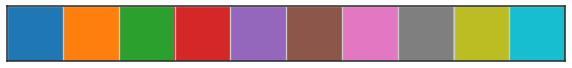

In [64]:
sns.palplot(sns.color_palette('tab10', n_colors=10))

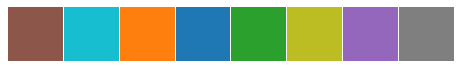

In [41]:
fuel_order = [5, -1, 1, 0, 2, -2, 4, -3]
fuel_palette = [sns.color_palette('tab10', n_colors=10)[x]
                for x in fuel_order]
sns.palplot(fuel_palette)

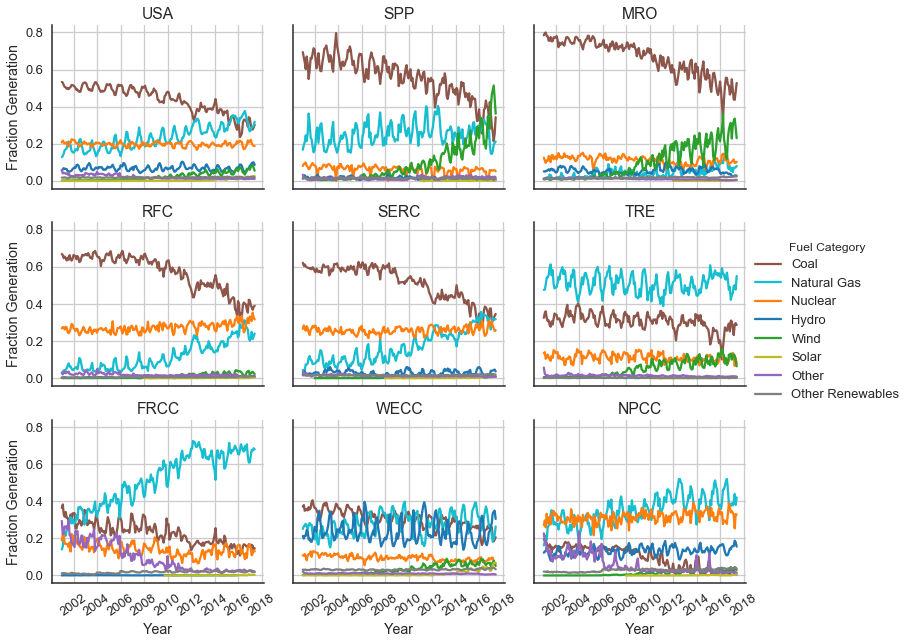

In [48]:
order = ['USA', 'SPP', 'MRO', 'RFC', 'SERC', 'TRE', 'FRCC', 'WECC', 'NPCC']
fuel_order = ['Coal', 'Natural Gas', 'Nuclear', 'Hydro', 'Wind', 'Solar',
              'Other', 'Other Renewables']
temp = per_gen.copy()
temp.rename(columns={'fuel category': 'Fuel Category'}, inplace=True)

FG_kwargs = dict(hue='Fuel Category',
                 col='nerc',
                 col_wrap=3,
                 aspect=1.2,
                 hue_order=fuel_order,
                 palette=fuel_palette)

region_facet_grid(df=temp, plot_function=plt.plot, x_axis='datetime',
                  add_legend=True, y_axis='Fraction Generation', col_order=order, 
                  suptitle='', FG_kwargs=FG_kwargs, ax_labels='Year',
                  context='talk', font_scale=1)

path = join(cwd, '..', 'Figures', 'Generation by fuel_full.pdf')
plt.savefig(path, bbox_inches='tight')

## Figure of wind, nat gas, and coal

In [78]:
per_gen.dtypes

datetime               datetime64[ns]
fuel category                  object
Fraction Generation           float64
month                         float64
nerc                           object
year                          float64
dtype: object

In [82]:
per_gen.loc[(per_gen['fuel category'].isin(['Wind', 'Coal', 'Natural Gas'])) & 
                             (per_gen.nerc.isin(order)) &
                             (per_gen.year >= 2005)].head()

,datetime,fuel category,Fraction Generation,month,nerc,year
2612,2005-01-01,Coal,0.753739,NaN,MRO,2005
2613,2005-02-01,Coal,0.766800,NaN,MRO,2005
2614,2005-03-01,Coal,0.780396,NaN,MRO,2005
2615,2005-04-01,Coal,0.774250,NaN,MRO,2005
2616,2005-05-01,Coal,0.762964,NaN,MRO,2005


In [95]:
order = ['SPP', 'TRE', 'MRO']
fuels = ['Coal', 'Natural Gas', 'Nuclear', 'Hydro', 'Wind', 'Solar']
per_gen.year = per_gen.year.astype(int)
temp_df = per_gen.loc[(per_gen['fuel category'].isin(['Wind', 'Coal', 'Natural Gas'])) & 
                             (per_gen.nerc.isin(order)) &
                             (per_gen.year >= 2005)].copy()

def early_late(x):
    if x <= 2008:
        return '2005-2008'
    elif x <= 2012:
        return '2009-2012'
    elif x <= 2016:
        return '2013-2016'
    else:
        return ValueError

temp_df.loc[:, 'timeframe'] = temp_df.loc[:, 'year'].map(early_late)
merge_cols = ['nerc', 'month', 'year']
temp_df = pd.merge(temp_df, index[merge_cols + ['generation (mwh)']],
                   on=merge_cols)
temp_df['generation'] = (temp_df.loc[:, 'Fraction Generation']
                         * temp_df.loc[:, 'generation (mwh)'] / 1e6)

In [96]:
temp_df.head()

,datetime,fuel category,Fraction Generation,month,nerc,year,timeframe,generation (mwh),generation
0,2005-01-01,Coal,0.753739,1,MRO,2005,2005-2008,1.552018e+07,11.698157
1,2005-01-01,Natural Gas,0.025970,1,MRO,2005,2005-2008,1.552018e+07,0.403064
2,2005-01-01,Wind,0.014663,1,MRO,2005,2005-2008,1.552018e+07,0.227579
3,2005-02-01,Coal,0.766800,2,MRO,2005,2005-2008,1.338076e+07,10.260365
4,2005-02-01,Natural Gas,0.024931,2,MRO,2005,2005-2008,1.338076e+07,0.333600


In [97]:
# a is the list of colors
a = fuel_palette[0:2]
a.append(fuel_palette[4])

In [98]:
a

[(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.090196078431372548, 0.74509803921568629, 0.81176470588235294),
 (0.17254901960784313, 0.62745098039215685, 0.17254901960784313)]

/Users/greg/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


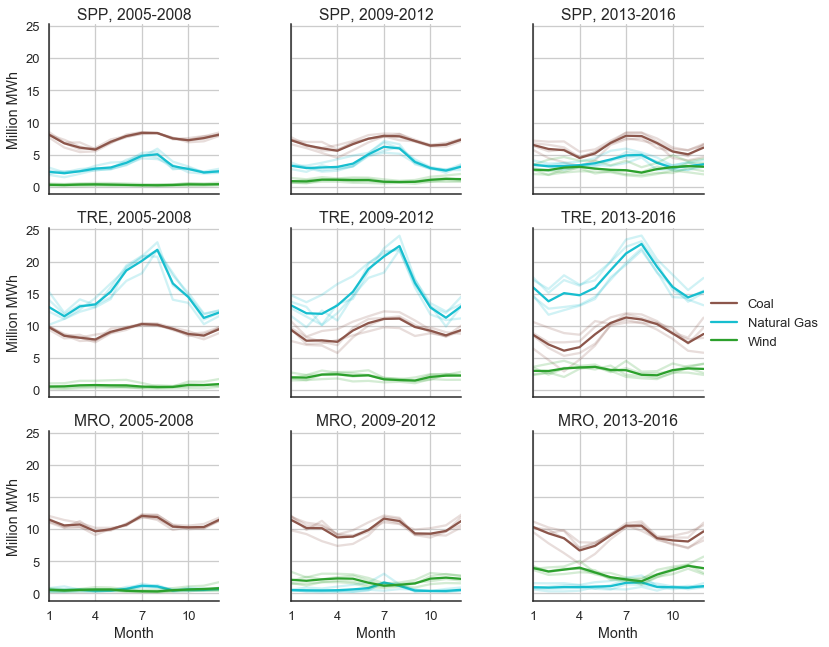

In [110]:
col_order = ['2005-2008', '2009-2012', '2013-2016']

with sns.plotting_context(font_scale=1.2):
    g = sns.FacetGrid(temp_df, col='timeframe', row='nerc',
                      col_order=col_order, row_order=order, aspect=1.1)
    g.map_dataframe(sns.tsplot, time='month', unit='year', value='generation', 
                    condition='fuel category', err_style='unit_traces', color=a).add_legend()
    g.set_axis_labels('Month', 'Million MWh')
    titles = ['{}, {}'.format(a, b) for (a, b) in 
              list(itertools.product(order, col_order))]
    axes = g.axes.flatten()
    for ax, title in zip(axes, titles):
        ax.set_title(title)
        ax.set_xticks([1, 4, 7, 10])
# plt.tight_layout()

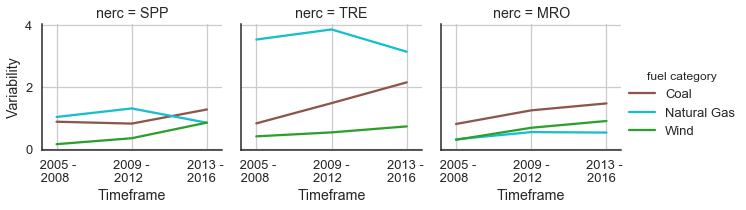

In [105]:
map_timeframe = {'2005-2008': 0,
                 '2009-2012': 0.5,
                 '2013-2016': 1}

data = (temp_df.groupby(['nerc', 'fuel category', 'timeframe'])
                   .std()
                   .reset_index())
data['frame'] = data['timeframe'].map(map_timeframe)
data.sort_values(['nerc', 'fuel category', 'frame'], inplace=True)

g = sns.FacetGrid(data, hue='fuel category', col='nerc',
                  col_order=['SPP', 'TRE', 'MRO'], palette=a)
g.map(plt.plot, 'frame', 'generation').add_legend()
g.set_axis_labels('Timeframe', 'Variability')
axes = g.axes.flatten()
for ax in axes:
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels([' 2005 -\n 2008  ', '2009 -\n2012  ',
                        '2013 - \n2016   '])
    ax.set_xlim(-.1, 1.1)

## Correlation figures

In [96]:
index.head()

,change since 2005,datetime,final co2 (kg),generation (mwh),index (g/kwh),index (lb/mwh),month,nerc,quarter,year
0,0.076326,2001-01-01,2.149920e+11,332493160.0,646.604591,1425.504481,1,USA,1.0,2001
1,0.060812,2001-02-01,1.803140e+11,282940198.0,637.284923,1404.958340,2,USA,1.0,2001
2,0.046964,2001-03-01,1.891340e+11,300706544.0,628.965732,1386.617853,3,USA,1.0,2001
3,0.046860,2001-04-01,1.748850e+11,278078871.0,628.902838,1386.479197,4,USA,2.0,2001
4,0.048337,2001-05-01,1.892470e+11,300491621.0,629.790069,1388.435187,5,USA,2.0,2001


In [35]:
def nerc_correlation(df, regions=[], years=[], detrend=True):
    "Pass in non-detrended data. Detrend for just the years of interest"
    
    df_temp = df.loc[(df['nerc'].isin(regions)) &
                     (df['year'].isin(years))].copy()
    if detrend:
        for region in regions:
#             df_temp.loc[df_temp['nerc'].isin([region]), 'index (g/kwh)'] = detrend(df_temp.loc[df_temp['nerc'].isin([region]), 'index (g/kwh)'])
            a = df_temp.loc[df_temp['nerc'].isin([region]), 'index (g/kwh)']
        return a
    corr_df = df_temp.pivot_table(values='index (g/kwh)',
                                  index='datetime', columns='nerc').corr()
    return corr_df.iloc[1, 0]

In [22]:
df = index.loc[(index['nerc'].isin(('WECC', 'MRO'))) & 
          (index.year.isin([2001]))]

In [26]:
detrend(df.loc[df['nerc'] == 'WECC', 'index (g/kwh)'].values).T

array([  4.74528977,  18.26100659, -14.06993665,  -2.79790781,
        -4.21233928, -24.75276604,   6.85746108,  -5.85101906,
         9.28799452,  22.17360652,   9.11298431, -18.75437397])

In [37]:
# df = index.loc[(index['nerc'].isin(('WECC', 'MRO')))]
detrend(nerc_correlation(index, regions=['WECC', 'MRO'], years=[2001]))

396   -17.224860
397     1.786282
398    27.195172
399    -6.774700
400     6.666212
401   -12.739851
402    -1.876356
403    23.240896
404   -12.616186
405   -21.681460
406     8.456989
407     5.567862
Name: index (g/kwh), dtype: float64

In [ ]:
%pdb

In [38]:
order = ['USA', 'SPP', 'MRO', 'RFC', 'SERC', 'TRE', 'FRCC', 'WECC', 'NPCC']
years = range(2001, 2017)
df_list = []
region_pairs = [('WECC', 'MRO'),
                ('WECC', 'SPP'),
                ('WECC', 'TRE'),
                ('TRE', 'SPP'),
                ('TRE', 'SERC'),
                ('SPP', 'MRO'),
                ('SPP', 'SERC'),
                ('SERC', 'FRCC'),
                ('SERC', 'MRO'),
                ('SERC', 'RFC'),
                ('RFC', 'NPCC'),
                ('MRO', 'NPCC')]

for regions in region_pairs:
    corr_df = pd.DataFrame(columns=['Year', 'Region1', 'Region2', 'Correlation'],
                           index=years)
    corr_df['Year'] = years
    corr_df['Region1'] = regions[0]
    corr_df['Region2'] = regions[1]
    for year in years: #[years[x:x+2] for x in xrange(0, len(years), 2)]:
        result = nerc_correlation(index, regions=regions, years=[year], detrend=False)
        corr_df.loc[year, 'Correlation'] = result
    df_list.append(corr_df)

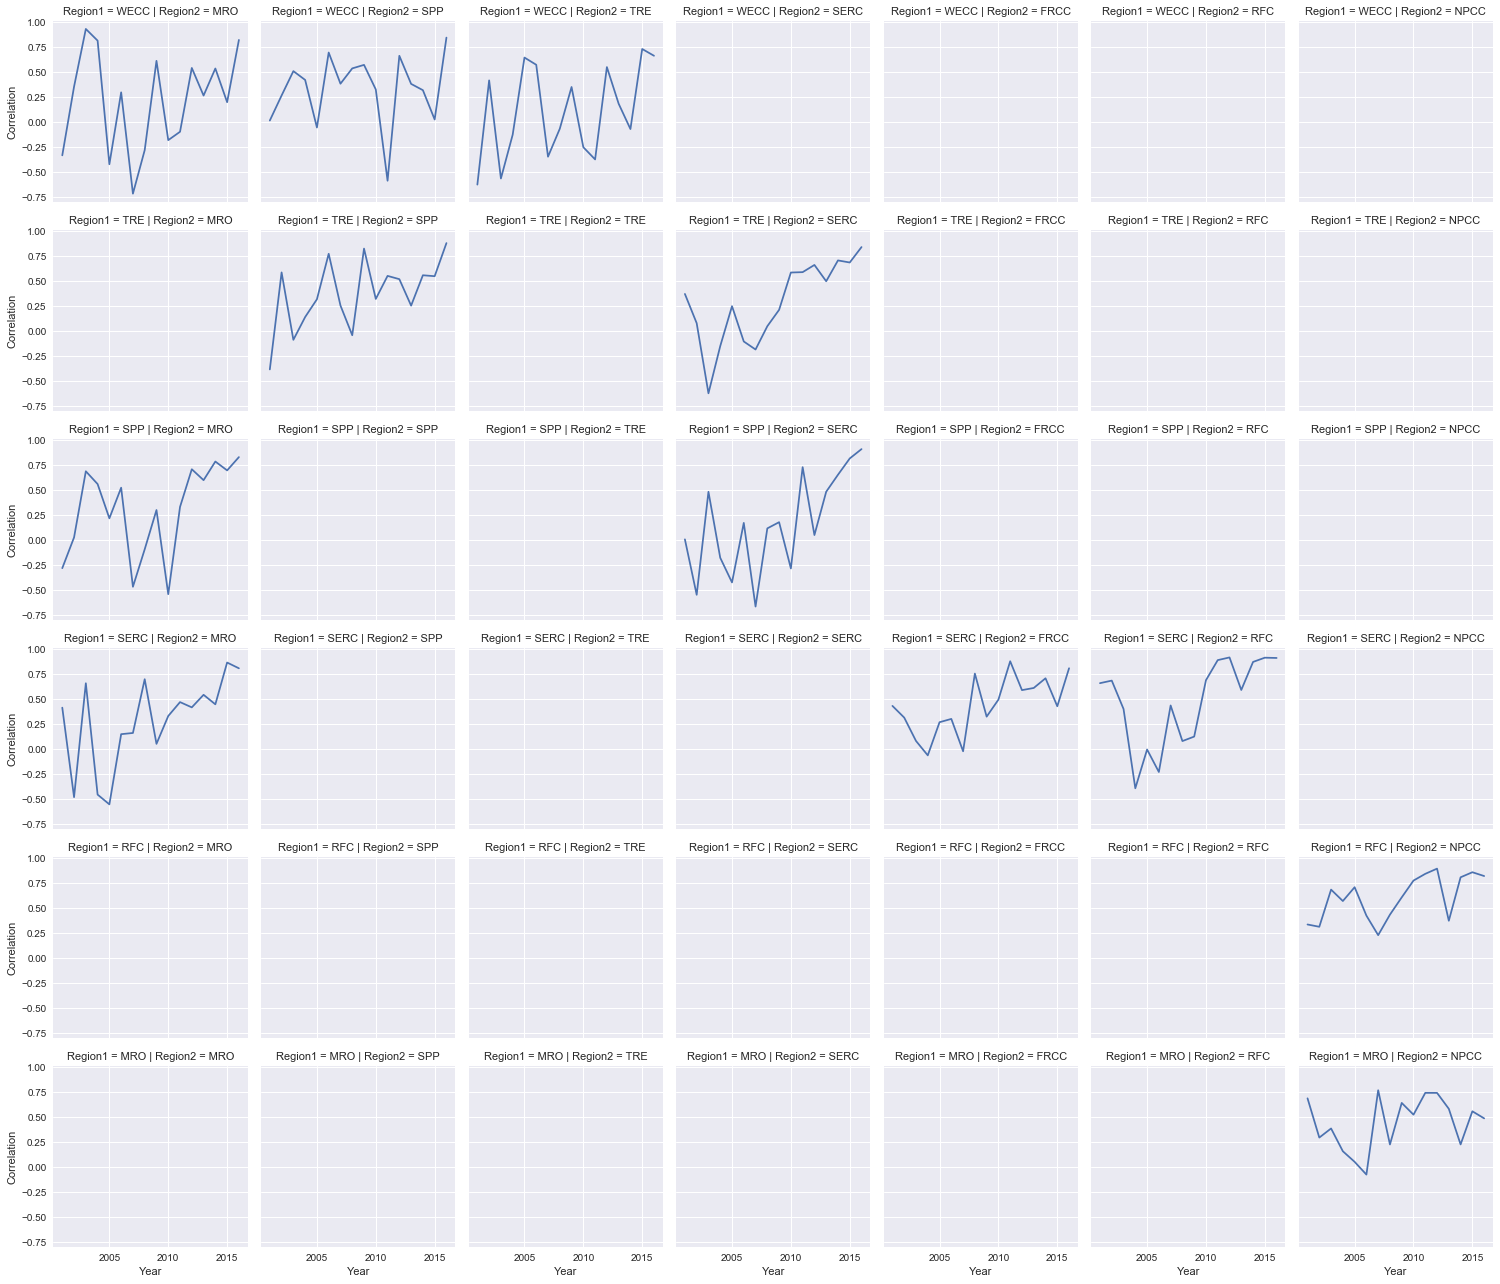

In [39]:
g = sns.FacetGrid(pd.concat(df_list), row='Region1', col='Region2')
g.map(plt.plot, 'Year', 'Correlation')

In [71]:
regions = ['USA', 'SPP', 'MRO', 'RFC', 'SERC', 'TRE', 'FRCC', 'WECC', 'NPCC']
nerc_index = (index.loc[(index['nerc'].isin(regions))]
              .pivot_table(values='index (g/kwh)',
                           index='datetime', columns='nerc'))
nerc_index_detrend = pd.DataFrame(index=nerc_index.index)
for col in nerc_index.columns:
    nerc_index_detrend.loc[:, col] = detrend(nerc_index.loc[:, col])

In [72]:
nerc_index_detrend.head()

,FRCC,MRO,NPCC,RFC,SERC,SPP,TRE,USA,WECC
datetime,,,,,,,,,
2001-01-01,24.327043,-49.140475,51.123976,-36.933094,-3.685741,-25.610073,-19.351111,-1.139179,21.000954
2001-02-01,15.229670,-31.237821,13.863431,-26.491929,-25.466524,-76.516654,-17.008722,-9.521065,35.437128
2001-03-01,-17.472741,-6.937419,32.647532,-37.061958,-29.153470,-76.478746,3.963501,-16.902474,4.026643
2001-04-01,17.777126,-42.015778,-32.585735,-19.645028,-21.015768,-86.696864,-11.179233,-16.027587,16.219129
2001-05-01,56.851354,-29.683354,-15.000011,-32.206502,-18.814945,-67.357025,-20.286189,-14.202574,15.725155


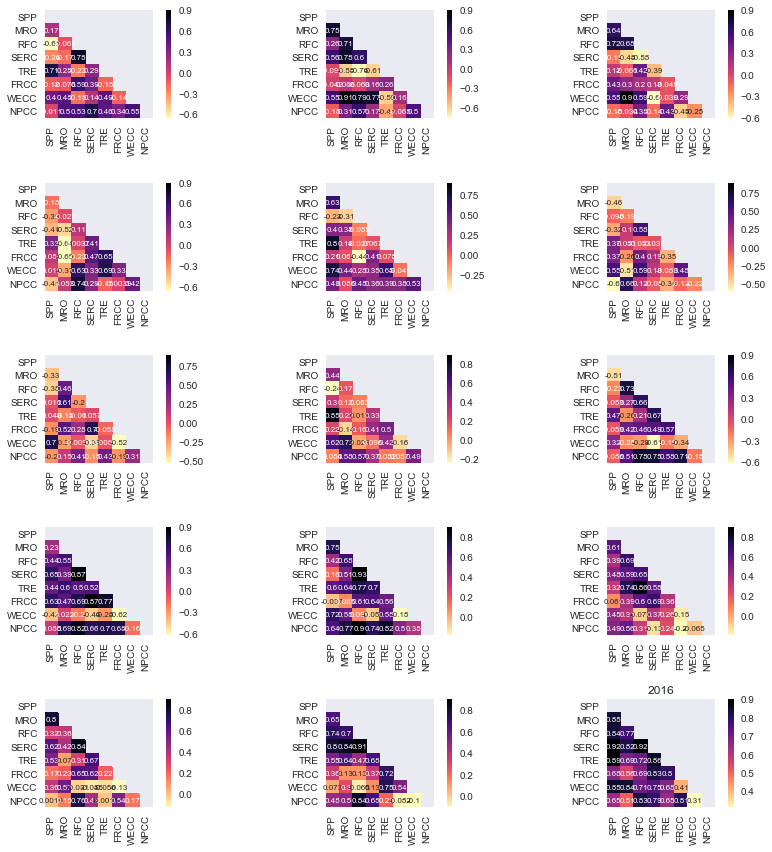

In [86]:
fig, ax = plt.subplots(5, 3, figsize=(12,12))
order = ['USA', 'SPP', 'MRO', 'RFC', 'SERC', 'TRE', 'FRCC', 'WECC', 'NPCC']

axs = ax.flatten()

for idx, year in enumerate(range(2002, 2017)):
    ax = axs[idx]
    corr = nerc_index_detrend.loc[nerc_index_detrend.index.year == year, order[1:]].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, vmax = 0.9, mask=mask, square=True, annot=True,
                annot_kws={'size': 8}, cmap='magma_r', ax=axs[idx])
    cax = plt.gca()
    cax.set_title('{}'.format(year))
plt.tight_layout()
path = join(cwd, '..', 'Figures', 'Test corr.pdf')
plt.savefig(path, bbox_inches='tight')